Jupyter with virtual environments: https://janakiev.com/blog/jupyter-virtual-envs/ 

This is a quick notebook to show one way to implement an MCMC very quickly. https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm 

Pick some test function eg https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def func(pars, x):
    # Rastrigin function
    # x is the multidimensional position vector
    n = len(x)
    A = 10.
    return A*n+np.sum([x[i]**2-A*np.cos(2*np.pi*x[i]) for i in range(n)])
    
    

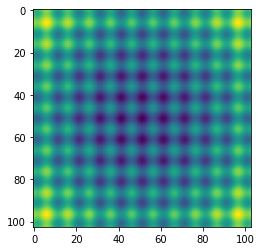

In [3]:
plt.imshow(np.array([[func([],[i,j]) for i in np.arange(-5.12,5.12,0.1)] for j in np.arange(-5.12,5.12,0.1)]))

This function is one to be minimized, but the general principle remains the same in a maximum case too.
Ideally the cost space is positive definite. If there are odd features with the parameter space or whatever, then constraints have to be imposed somehow. They can be imposed either via candidate x selection or via some cost premium.

In [4]:
#initialize
dim = 4 # can change dimensionality 
x = 5.-10.*np.random.rand(dim)
cost = func([],x)
xMin = np.copy(x)
costMin = np.copy(cost)
xHist = np.array([x])
costHist = np.array([cost])


This is the most basic MCMC metropolis hastings code.

In [5]:
step = 1.
for k in range(10000):
    xStar = x + step*(1.-2.*np.random.rand(dim))
    costStar = func([],xStar)
    # Determine whether to move the chain forward
    if cost/costStar > np.random.rand(1)[0]:
        x = xStar
        cost = costStar
        xHist = np.append(xHist,[x],axis=0)
        costHist = np.append(costHist,cost)
    # Update the global minimum if necessary
    if cost < costMin:
        xMin = x
        costMin = cost
        print(cost)
        
print(xMin)
print(costMin)

64.40483056069189
60.906785111785595
54.516055785252284
51.293464944649955
40.837822703888136
36.02650645785448
34.89221485107711
25.19944168579814
15.116165479602802
11.699681802380987
[ 2.09589191 -0.01192815  1.06143226  0.1402082 ]
11.699681802380987


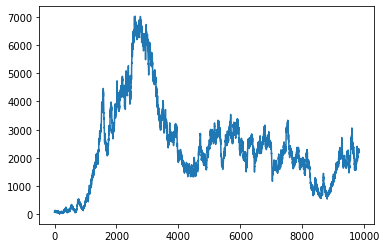

In [6]:
plt.plot(costHist)

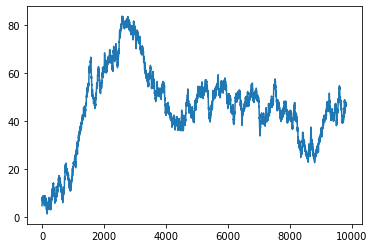

In [7]:
plt.plot(np.sum(xHist**2,axis=1)**0.5)

What we're finding here is that the chain is tending to wander away from the place we want it to. This is caused by two issues, first that the step size is arbitrary, and second that it's accepting too many bad options. We should monitor the acceptance rate and keep it around 0.25 by altering the annealing rate and changing the step size.

In [140]:
#initialize
dim = 5 # can change dimensionality 
x = 5.-10.*np.random.rand(dim)
cost = func([],x)
xMin = np.copy(x)
costMin = np.copy(cost)
xHist = np.array([x])
costHist = np.array([cost])
accept=np.zeros(20)
accept[::4]+=1.

In [141]:
step = 1.
anneal = 1.
stepDecrementIndex = 100000
maxSteps=1000000

for k in range(maxSteps):
    xStar = x + step*(1.-2.*np.random.rand(dim))
    costStar = func([],xStar)
    # This automatically adjusts the annealing exponent
    acceptRate = np.mean(accept)
    anneal = anneal*(1.+0.05*(acceptRate/0.25-1))
    # automatically adjust step size (heuristic)
    # Determine whether to move the chain forward
    if (cost/costStar)**anneal > np.random.rand(1)[0]:
        x = xStar
        cost = costStar
        xHist = np.append(xHist,[x],axis=0)
        costHist = np.append(costHist,cost)
        accept = np.append(1.,accept[:-1])
    else:
        accept = np.append(0.,accept[:-1])
    # Update the global minimum if necessary
    if cost < costMin:
        xMin = x
        costMin = cost
        print([cost,anneal])
        
    # Every so often steps reset the chain and reduce the step size
    if (k+1)%stepDecrementIndex==0:
        #x = xMin
        #cost = costMin
        step = 0.75*step
        print(cost)
        
print(xMin)
print(costMin)

[98.27902593637158, 1.0]
[96.43615605253672, 1.1934895845600002]
[90.43112214493135, 1.4214651910443132]
[89.64722089036079, 5.416375053872296]
[83.21682243851683, 13.323872371033868]
[82.32842874102595, 16.076280407056505]
[78.3785255663638, 15.751604005503141]
[74.75050980395378, 10.501758870218556]
[58.518871813004914, 10.087947668714053]
[50.38100294954459, 6.61933393425741]
[43.259306515899645, 10.313109137452187]
[41.28250506579225, 6.496722810286507]
[40.53367792641549, 6.624949951950782]
[32.86438364672316, 7.6099850586996505]
[27.502893901629932, 5.11461632232596]
[17.894999600586345, 8.744791693812981]
[17.156936056481612, 5.551482741556442]
[13.435851122511593, 5.811671716491128]
[11.275238436191572, 3.590857367168564]
[7.566846034208233, 9.386003833421546]
[4.576784113977759, 5.804182273696109]
75.42633608201487
32.25601537036634
98.92584300310271
76.66467264872121
[4.509673762410749, 3.5085884637873916]
44.7198502520909
[1.077886649969706, 3.540188736640943]
35.10641675316

The plot below shows how the chain preferentially focuses in areas of low cost. The global optimum is found in about a second. Not bad for 2 dimensions. 

Running in 10 dimensions, it's a bit more hit and miss. Step size selection could be improved.

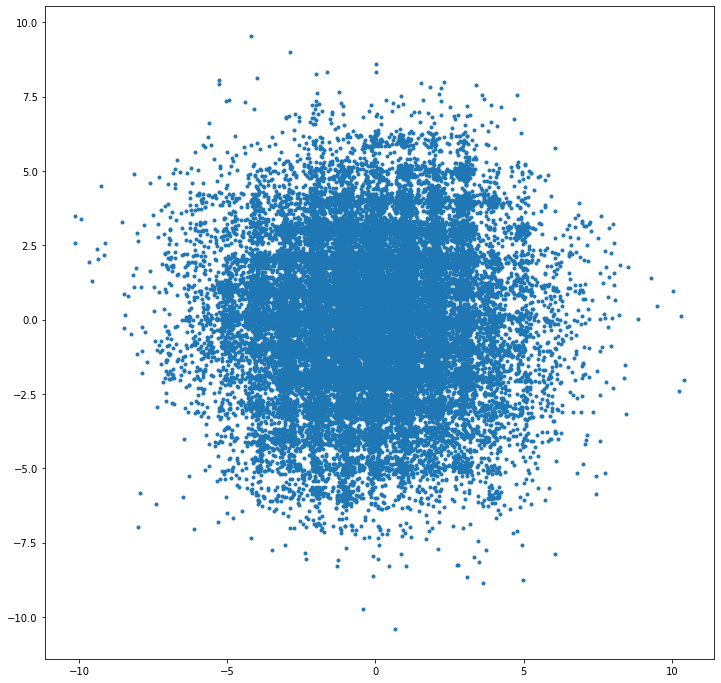

In [142]:
plt.figure(figsize=(12,12))
plt.scatter(xHist[::5,0],xHist[::5,1],marker=".")

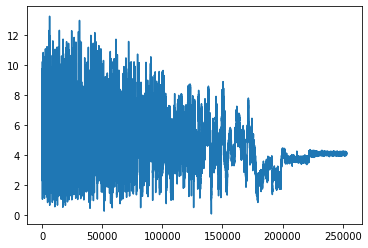

In [143]:
plt.plot(np.sum(xHist**2,axis=1)**0.5)